In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [509]:
df = pd.read_csv("mumbai_flats.csv")
df

,flat_type,price,address,buildup_area,avg_price_sqft,age_of_property,possesion_status,which_floor,facing,furnicing,project_name,brokrage,carpet_area,bedrooms,bathrooms,balcony,parking,about_property
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550 sq.ft,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,NaN,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking,Exclusive 3 bhk with 3 bathroom apartment ava...
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630 sq.ft,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,NaN,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking,"1 BHK Flat for sale in Palghar, Mumbai - conta..."
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580 sq.ft,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,NaN,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking,1 BHK Flat for sale in Mumbai. This property i...
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410 sq.ft,₹26.83 K/sq.ft,1 Years Old,Ready to move,Higherof 35 floors,Semi Furnished,NaN,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,2 Covered Parking,Check out this 1 BHK Flat for sale in Dahisar ...
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052 sq.ft,₹21.39 K/sq.ft,1 Years Old,Ready to move,Lowerof 26 floors,Semi Furnished,NaN,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1 Covered Parking,"Situated in ghatkopar east, central mumbai sub..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,1 BHK Flat,97.0 L,"Gokuldham tardeo, Gowalia Tank, Tardeo, Mumbai",315 sq.ft,₹30.79 K/sq.ft,Ready to move,North-West facing,Semi FurnishedFurnishing,NaN,NaN,No ChargeAccess Zero Brokerage Properties,97.0 L,1,1,No Balcony,More than a month ago,1 Open Parking,"1 BHK Flat for sale in Tardeo, Mumbai with mod..."
9951,3 BHK Independent House,5.5 Cr,"Unnat Nagar, Motilal Nagar II, Goregaon West, ...",1000 sq.ft,₹55 K/sq.ft,Ready to move,North-West facing,Fully FurnishedFurnishing,NaN,NaN,Unnat Nagar,No ChargeAccess Zero Brokerage Properties,1000 sq.ft,3,1,2,No Parking,3 BHK Independent House for sale in Goregaon W...
9952,1 RK Independent House,40.0 L,"Bhendi Bazaar, Bhuleshwar, Mumbai",200 sq.ft,₹20 K/sq.ft,Ready to move,North-West facing,Semi FurnishedFurnishing,NaN,NaN,No ChargeAccess Zero Brokerage Properties,40.0 L,1,1,-,More than a month ago,No Parking,One of the finest property in Bhuleshwar is no...
9953,2 BHK Flat,2.36 Cr,"Gandhi Nagar, Kandivali West, Mumbai",706 sq.ft,₹33.41 K/sq.ft,2 Year Old,Ready to move,Middleof 40 floors,Unfurnished,NaN,Ruparel Elara,No ChargeAccess Zero Brokerage Properties,424 sq.ft,2,2,-,-,constructed numerous Commercial & Residential ...


In [510]:
df = df.drop(columns=['avg_price_sqft','possesion_status','project_name','brokrage','carpet_area','about_property'])

In [511]:
df.duplicated().sum()

204

In [512]:
df.drop_duplicates(inplace=True)

In [513]:
df.shape

(9751, 12)

In [514]:
df.isna().sum()

flat_type             0
price                 1
address               0
buildup_area          0
age_of_property       0
which_floor          48
facing             1934
furnicing          9750
bedrooms              1
bathrooms           109
balcony             188
parking               1
dtype: int64

In [515]:
df.sample(6)

,flat_type,price,address,buildup_area,age_of_property,which_floor,facing,furnicing,bedrooms,bathrooms,balcony,parking
9026,3 BHK Flat,2.25 Cr,"Arihant Residency, Samarth Nagar, Sion, Mumbai",1309 sq.ft,1 Years Old,Higherof 23 floors,Unfurnished,NaN,3,2,No Balcony,1 Covered Parking
8154,3 BHK Flat,6.7 Cr,"Godrej RKS, Postal Colony, Chembur, Mumbai",1579 sq.ft,1 Years Old,Middleof 16 floors,Semi Furnished,NaN,3,2,1,1 Covered and 1 Open Parking
3964,5 BHK Flat,12.0 Cr,"Kamala Nagar, Vile Parle West, Mumbai",2000 sq.ft,6 Year Old,Middleof 12 floors,NaN,NaN,5,3,More than a month ago,No Parking
6083,1 BHK Flat,1.25 Cr,"As on request, Daulat Nagar, Borivali East, Mu...",570 sq.ft,5 Year Old,Middleof 7 floors,Fully Furnished,NaN,2,No Balcony,3 days ago,1 Covered Parking
5138,2 BHK Flat,1.74 Cr,"Ronit residence goregaon East, Aarey Colony, G...",820 sq.ft,6 Year Old,Higherof 12 floors,Unfurnished,NaN,2,No Balcony,16 days ago,1 Covered Parking
8766,3 BHK Flat,4.0 Cr,"Yashwanth Nagar, Chembur, Mumbai",1250 sq.ft,2 Year Old,Higherof 15 floors,Fully Furnished,NaN,2,1,More than a month ago,1 Covered Parking


In [516]:
df['flat_type'].unique()

array(['3 BHK Flat', '1 BHK Flat', '2 BHK Flat', '4 BHK Flat',
       '7 BHK Flat', '1.5 BHK Flat', '3 BHK Independent Builder Floor',
       '1 BHK Independent House', '5 BHK Independent Builder Floor',
       '6 BHK Flat', '3 BHK Villa', '5 BHK Flat',
       '4 BHK Independent House', '4 BHK Villa', '1 RK Flat',
       '2 BHK Independent House', '3 BHK Independent House',
       '5+ BHK Flat', '1 BHK Independent Builder Floor',
       '3.99 Cr - 10.15 Cr', '4 BHK Independent Builder Floor',
       '5 BHK Villa', '6 BHK Villa', '10 BHK Independent House',
       'Agricultural Land', '1 RK Independent House'], dtype=object)

In [517]:
df = df[df['flat_type'].isin(['1 BHK Flat', '2 BHK Flat', '3 BHK Flat','4 BHK Flat','5 BHK Flat','6 BHK Flat','7 BHK Flat'])]

In [518]:
df.shape

(9642, 12)

In [519]:
df['price'].unique()

array(['3.95 Cr', '19.0 L', '73.0 L', '1.1 Cr', '2.25 Cr', '2.75 Cr',
       '2.1 Cr', '7.5 Cr', '1.0 Cr', '2.2 Cr', '5.4 Cr', '4.45 Cr',
       '5.24 Cr', '2.8 Cr', '1.2 Cr', '2.04 Cr', '11.0 Cr', '66.0 L',
       '2.38 Cr', '2.15 Cr', '2.0 Cr', '38.0 L', '3.85 Cr', '72.0 L',
       '6.8 Cr', '60.41 L', '4.2 Cr', '2.5 Cr', '1.52 Cr', '7.2 Cr',
       '1.3 Cr', '1.35 Cr', '6.5 Cr', '32.0 L', '40.0 L', '2.4 Cr',
       '95.0 L', '3.6 Cr', '8.74 Cr', '1.04 Cr', '2.65 Cr', '5.22 Cr',
       '30.0 L', '4.3 Cr', '2.6 Cr', '2.7 Cr', '3.56 Cr', '5.75 Cr',
       '25.5 L', '1.45 Cr', '9.39 Cr', '1.65 Cr', '2.05 Cr', '2.47 Cr',
       '88.0 L', '5.21 Cr', '1.15 Cr', '2.35 Cr', '1.6 Cr', '60.0 L',
       '2.95 Cr', '1.88 Cr', '15.0 Cr', '1.19 Cr', '1.95 Cr', '33.47 L',
       '1.18 Cr', '1.58 Cr', '5.0 Cr', '4.25 Cr', '2.03 Cr', '2.84 Cr',
       '17.6 Cr', '3.25 Cr', '3.4 Cr', '3.71 Cr', '5.76 Cr', '1.5 Cr',
       '5.1 Cr', '9.24 Cr', '3.2 Cr', '1.05 Cr', '4.1 Cr', '3.5 Cr',
       '1.75 Cr', 

In [520]:
df['price'].value_counts().sample(6)

price
59.9 L      1
3.7 Cr     22
6.05 Cr     1
9.2 Cr      3
8.2 Cr      3
7.24 Cr     1
Name: count, dtype: int64

In [521]:
def price_coverter(price):
    if 'L' in price:
        lakhs = price.split(" ")[0]
        return round(float(lakhs)/100,2)
    else:
        return float(price.split(" ")[0])

In [522]:
price_coverter("1.5 Cr")

1.5

In [523]:
df['price'] = df['price'].str.strip().apply(price_coverter)

In [524]:
df['address'].value_counts().sample(6)

address
DLH Legacy, Juhu Scheme, Juhu, Mumbai                                         1
khakkar Apartment, Sai Nagar, Kandivali West, Mumbai                          1
Shree Ostwal Ostwal Orchid 1 2 3 4 5, Beverly Park, Mira Road East, Mumbai    1
Supreme Lake Primrose, Panchkutir Ganesh Nagar, Powai, Mumbai                 1
Sajjan Wadi, Mulund East, Mumbai                                              1
New Dadar Chs, Naigaon, Dadar East, Mumbai                                    1
Name: count, dtype: int64

In [525]:
df['address'] = df['address'].str.strip().str.split(",").str[-2].str.strip()

In [526]:
df

,flat_type,price,address,buildup_area,age_of_property,which_floor,facing,furnicing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550 sq.ft,3 Year Old,Higherof 50 floors,Fully Furnished,NaN,3,2,1,2 Covered Parking
1,1 BHK Flat,0.19,Palghar,630 sq.ft,3 Year Old,Middleof 4 floors,Unfurnished,NaN,1,1,2,1 Open Parking
2,1 BHK Flat,0.73,Mira Road East,580 sq.ft,1 Years Old,Lowerof 25 floors,Semi Furnished,NaN,1,2,2,No Parking
3,1 BHK Flat,1.10,Dahisar East,410 sq.ft,1 Years Old,Higherof 35 floors,Semi Furnished,NaN,1,2,1,2 Covered Parking
4,3 BHK Flat,2.25,Ramabai Ambedkar Nagar,1052 sq.ft,1 Years Old,Lowerof 26 floors,Semi Furnished,NaN,3,2,3,1 Covered Parking
...,...,...,...,...,...,...,...,...,...,...,...,...
9947,1 BHK Flat,0.20,Naigaon East,280 sq.ft,10 Year Old,Lowerof 7 floors,Semi Furnished,NaN,1,No Balcony,4 days ago,No Parking
9948,2 BHK Flat,10.50,Cumballa Hill,1170 sq.ft,45 Year Old,Lowerof 9 floors,Unfurnished,NaN,3,1,2 days ago,1 Covered Parking
9950,1 BHK Flat,0.97,Tardeo,315 sq.ft,Ready to move,Semi FurnishedFurnishing,NaN,NaN,1,No Balcony,More than a month ago,1 Open Parking
9953,2 BHK Flat,2.36,Kandivali West,706 sq.ft,2 Year Old,Middleof 40 floors,Unfurnished,NaN,2,2,-,-


In [527]:
df.duplicated().sum()

47

In [528]:
df.drop_duplicates(inplace=True)

In [529]:
df['address'].unique()

array(['Kanjurmarg West', 'Palghar', 'Mira Road East', 'Dahisar East',
       'Ramabai Ambedkar Nagar', 'Anushakti Nagar', 'Kanjurmarg East',
       'Byculla', 'Kurla West', 'Mulund West', 'Sion', 'Powai',
       'Lower Parel', 'Borivali East', 'Malad West', 'Virar West',
       'Goregaon West', 'Naigaon East', 'Vasai East', 'Andheri West',
       'Vikhroli East', 'Borivali West', 'Goregaon East', 'Dadar East',
       'Dadar West', 'Wadala East', 'Govandi', 'Saphale', 'Mulund East',
       'Santacruz East', 'Chembur', 'Kandivali East', 'Juhu',
       'Vile Parle East', 'Jogeshwari West', 'Nalasopara West', 'Worli',
       'Kandivali West', 'Prabhadevi', 'Matunga East', 'Bandra East',
       'Parel', 'Ghatkopar East', 'Andheri East', 'Jogeshwari East',
       'Dahisar West', 'Matunga West', 'Bhandup West', 'Khar West',
       'Ghatkopar West', 'Bhayandar East', 'Mumbai Central', 'Wadala',
       'Bandra West', 'Santacruz West', 'Malad East', 'Chinchpokli',
       'Nalasopara East', 'Vil

In [530]:
df['address'].value_counts()

address
Mira Road East    887
Chembur           568
Powai             467
Andheri West      466
Kandivali East    464
                 ... 
Ghodbander          1
Uttan               1
Umerkhadi           1
Mira Road West      1
Nagpada             1
Name: count, Length: 100, dtype: int64

In [531]:
# replace the minor location to others
def replace_address_name(location):
    if 'Ramabai Ambedkar Nagar' in location:
        return 'others'
    elif 'Anushakti Nagar' in location:
        return 'others'
    elif 'Saphale' in location:
        return 'others'
    elif 'Fort' in location:
        return 'others'
    elif 'Mankhurd' in location:
        return 'others'
    elif 'Dharamveer Nagar' in location:
        return 'others'
    elif 'Asalpha' in location:
        return 'others'
    elif 'Kalbadevi' in location:
        return 'others'
    elif 'Jacob Circle' in location:
        return 'others'
    elif 'Makane Kapase' in location:
        return 'others'
    elif 'Ghodbander' in location:
        return 'others'
    elif 'Uttan' in location:
        return 'others'
    elif 'Umerkhadi' in location:
        return 'others'
    elif 'Nagpada' in location:
        return 'others'
    elif 'Trombay' in location:
        return 'others'
    elif 'Juhu' in location:
        return 'Santacruz West'
    elif 'Gamdevi' in location:
        return 'others'
    elif 'Chinchpokli' in location:
        return 'others'
    elif 'Mira Road West' in location:
        return 'others'
    elif 'Khar East' in location:
        return 'others'
    else:
        return location

In [532]:
df['address'] = df['address'].apply(replace_address_name)

In [533]:
df.duplicated().sum()

0

In [534]:
df['buildup_area']

0       1550 sq.ft
1        630 sq.ft
2        580 sq.ft
3        410 sq.ft
4       1052 sq.ft
           ...    
9947     280 sq.ft
9948    1170 sq.ft
9950     315 sq.ft
9953     706 sq.ft
9954     500 sq.ft
Name: buildup_area, Length: 9595, dtype: object

In [535]:
df['buildup_area'] = df['buildup_area'].str.split(" ").str[0]

In [536]:
df['age_of_property'].unique()

array(['3 Year Old', '1 Years Old', '4 Year Old', '2 Year Old',
       'Ready to move', '2 BHK', '3 BHK', '1 BHK', '4 BHK', '15 Year Old',
       '10 Year Old', '30 Year Old', '7 Year Old', '12 Year Old',
       '5 Year Old', '20 Year Old', '8 Year Old', '9 Year Old',
       '22 Year Old', '25 Year Old', '17 Year Old', '6 Year Old',
       '11 Year Old', '16 Year Old', '13 Year Old', '18 Year Old',
       '27 Year Old', '14 Year Old', '35 Year Old', '40 Year Old',
       '23 Year Old', '19 Year Old', '45 Year Old', '21 Year Old',
       '24 Year Old', '50 Year Old', '31 Year Old', '26 Year Old',
       '52 Year Old', '42 Year Old', '28 Year Old', '60 Year Old',
       '32 Year Old', '36 Year Old', '48 Year Old', '80 Year Old',
       '71 Year Old', '41 Year Old', '29 Year Old', '53 Year Old',
       '38 Year Old', '99 Year Old', '5 BHK', '37 Year Old'], dtype=object)

In [537]:
df['age_of_property'].value_counts()

age_of_property
1 Years Old      1629
5 Year Old       1251
10 Year Old       925
2 Year Old        736
Ready to move     700
15 Year Old       616
3 Year Old        589
4 Year Old        493
20 Year Old       375
8 Year Old        364
7 Year Old        340
12 Year Old       315
6 Year Old        284
9 Year Old        146
25 Year Old       143
30 Year Old        82
18 Year Old        78
1 BHK              61
2 BHK              61
14 Year Old        56
16 Year Old        38
13 Year Old        37
3 BHK              37
40 Year Old        33
11 Year Old        31
17 Year Old        22
22 Year Old        22
35 Year Old        21
4 BHK              16
23 Year Old        14
19 Year Old        12
50 Year Old        10
45 Year Old         8
26 Year Old         6
28 Year Old         5
21 Year Old         5
38 Year Old         5
24 Year Old         4
31 Year Old         3
42 Year Old         3
32 Year Old         3
29 Year Old         2
52 Year Old         2
60 Year Old         2
5 BHK           

In [538]:
def extract_age(value):
    if value.split(" ")[-1] == "Old":
        return int(value.split(" ")[0])
    else:
        return np.nan

In [539]:
extract_age("37 Year Old")

37

In [540]:
df['age_of_property'] = df['age_of_property'].apply(extract_age)

In [541]:
df['age_of_property']

0        3.0
1        3.0
2        1.0
3        1.0
4        1.0
        ... 
9947    10.0
9948    45.0
9950     NaN
9953     2.0
9954     NaN
Name: age_of_property, Length: 9595, dtype: float64

In [542]:
df['age_of_property'].isna().sum()

876

<Axes: xlabel='age_of_property', ylabel='Density'>

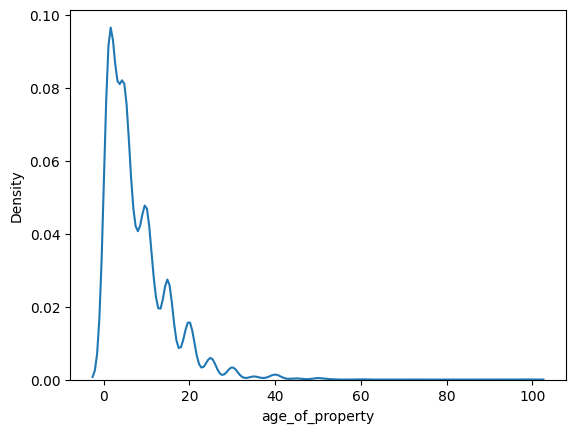

In [543]:
sns.kdeplot(df['age_of_property'])

In [544]:
df['age_of_property'].median()

5.0

In [545]:
df['age_of_property'] = df['age_of_property'].fillna(value=5)

<Axes: xlabel='age_of_property', ylabel='Density'>

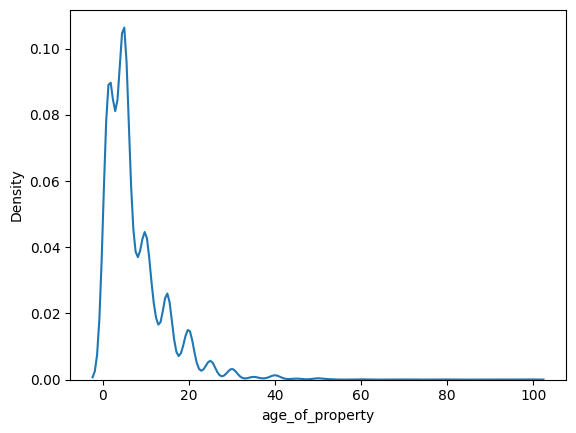

In [546]:
sns.kdeplot(df['age_of_property'])

In [548]:
df.duplicated().sum()

0

In [547]:
df['which_floor'].unique()

array(['Higherof 50 floors', 'Middleof 4 floors', 'Lowerof 25 floors',
       'Higherof 35 floors', 'Lowerof 26 floors', 'Lowerof 20 floors',
       'Middleof 50 floors', 'Higherof 36 floors', 'Middleof 46 floors',
       'Lowerof 14 floors', 'Middleof 38 floors', 'East facingFacing',
       'Lowerof 40 floors', 'Middleof 62 floors', 'Middleof 22 floors',
       'Middleof 36 floors', 'Higherof 58 floors', 'South facingFacing',
       'Middleof 7 floors', 'Middleof 23 floors', 'Higherof 48 floors',
       'Lowerof 23 floors', 'Middleof 48 floors', 'Middleof 14 floors',
       'Lowerof 48 floors', 'Middleof 72 floors', 'Middleof 34 floors',
       'Middleof 24 floors', 'Middleof 35 floors', 'Lowerof 15 floors',
       'Lowerof 30 floors', 'Higherof 71 floors', 'Higherof 22 floors',
       'Middleof 17 floors', 'Lowerof 22 floors', 'Lowerof 38 floors',
       'Lowerof 61 floors', 'Higherof 21 floors', 'Middleof 20 floors',
       'Higherof 16 floors', 'Higherof 4 floors', 'Middleof 30 flo

In [549]:
df['which_floor'].value_counts().sample(7)

which_floor
South-East facingFacing     25
Higherof 23 floors         100
Middleof 71 floors           2
West facingFacing           93
Middleof 19 floors          49
Lowerof 24 floors           28
Middleof 12 floors         225
Name: count, dtype: int64

In [550]:
df['which_floor'].isna().sum()

46

In [551]:
def extract_floor(value):
    if type(value) != float:
        a = value.split(" ")
        if len(a) == 3:
            b = a[1]
            b = int(b)
            return b
        else:
            return np.nan
    else:
        return np.nan

In [552]:
extract_floor("Middleof 92 floors")

92

In [553]:
extract_floor("2023Possession status")

nan

In [554]:
df['which_floor'] = df['which_floor'].str.strip().apply(extract_floor)

<Axes: xlabel='which_floor', ylabel='Density'>

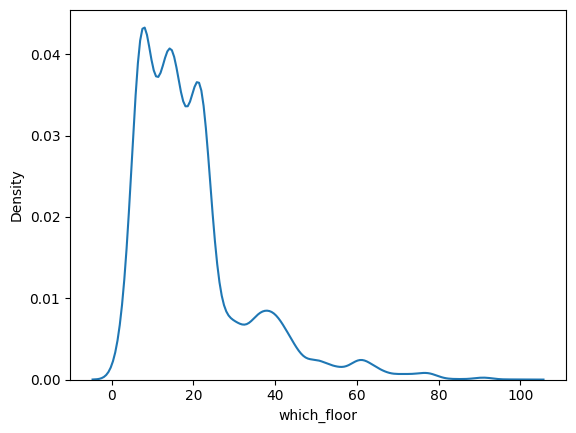

In [555]:
sns.kdeplot(df['which_floor'])

In [556]:
df['which_floor'].median()

16.0

In [557]:
df['which_floor'] = df['which_floor'].fillna(16)

<Axes: xlabel='which_floor', ylabel='Density'>

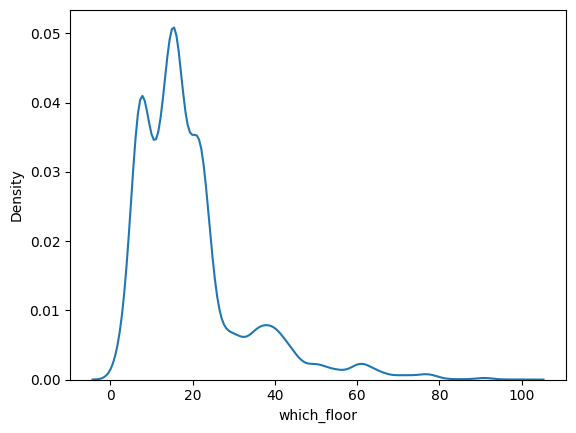

In [558]:
sns.kdeplot(df['which_floor'])

In [559]:
df.duplicated().sum()

45

In [560]:
df.drop_duplicates(inplace=True)

In [561]:
df

,flat_type,price,address,buildup_area,age_of_property,which_floor,facing,furnicing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,3.0,50.0,Fully Furnished,NaN,3,2,1,2 Covered Parking
1,1 BHK Flat,0.19,Palghar,630,3.0,4.0,Unfurnished,NaN,1,1,2,1 Open Parking
2,1 BHK Flat,0.73,Mira Road East,580,1.0,25.0,Semi Furnished,NaN,1,2,2,No Parking
3,1 BHK Flat,1.10,Dahisar East,410,1.0,35.0,Semi Furnished,NaN,1,2,1,2 Covered Parking
4,3 BHK Flat,2.25,others,1052,1.0,26.0,Semi Furnished,NaN,3,2,3,1 Covered Parking
...,...,...,...,...,...,...,...,...,...,...,...,...
9947,1 BHK Flat,0.20,Naigaon East,280,10.0,7.0,Semi Furnished,NaN,1,No Balcony,4 days ago,No Parking
9948,2 BHK Flat,10.50,Cumballa Hill,1170,45.0,9.0,Unfurnished,NaN,3,1,2 days ago,1 Covered Parking
9950,1 BHK Flat,0.97,Tardeo,315,5.0,16.0,NaN,NaN,1,No Balcony,More than a month ago,1 Open Parking
9953,2 BHK Flat,2.36,Kandivali West,706,2.0,40.0,Unfurnished,NaN,2,2,-,-


In [562]:
df.isna().sum()

flat_type             0
price                 0
address               0
buildup_area          0
age_of_property       0
which_floor           0
facing             1892
furnicing          9549
bedrooms              0
bathrooms           108
balcony             185
parking               0
dtype: int64

In [563]:
df['facing'].unique()

array(['Fully Furnished', 'Unfurnished', 'Semi Furnished', nan,
       'East facing'], dtype=object)

In [564]:
df['facing'].value_counts()

facing
Semi Furnished     3532
Unfurnished        3066
Fully Furnished    1059
East facing           1
Name: count, dtype: int64

In [565]:
df[df['facing'] == 'East facing']

,flat_type,price,address,buildup_area,age_of_property,which_floor,facing,furnicing,bedrooms,bathrooms,balcony,parking
1261,3 BHK Flat,2.51,Dahisar West,1050,5.0,16.0,East facing,Semi Furnished,3,4,No Balcony,1 Covered Parking


In [566]:
df = df.drop(index=1261)

In [567]:
df.rename(columns={"facing":"furnishing"},inplace=True)

In [568]:
df.drop(columns=['furnicing'],inplace=True)

In [569]:
df.isna().sum()

flat_type             0
price                 0
address               0
buildup_area          0
age_of_property       0
which_floor           0
furnishing         1892
bedrooms              0
bathrooms           108
balcony             185
parking               0
dtype: int64

In [570]:
df['furnishing'].unique()

array(['Fully Furnished', 'Unfurnished', 'Semi Furnished', nan],
      dtype=object)

In [571]:
df['furnishing'].mode()[0]

'Semi Furnished'

In [572]:
df['furnishing'] = df['furnishing'].fillna(df['furnishing'].mode()[0])

In [573]:
df['bedrooms'].value_counts()

bedrooms
2                        3887
1                        2445
3                        2334
4                         650
5                         114
No Balcony                 53
6                          46
-                          15
7                           4
More than a month ago       1
Name: count, dtype: int64

In [574]:
df['bedrooms'].unique()

array(['3', '1', '2', '4', '7', 'No Balcony', '6', '5', '-',
       'More than a month ago'], dtype=object)

In [576]:
def converter(value):
    try:
        a = int(value)
        return a
    except:
        return np.nan

In [577]:
converter("more than month")

nan

In [578]:
converter("6")

6

In [580]:
df['bedrooms'] = df['bedrooms'].apply(converter)

In [581]:
df['bedrooms'].isna().sum()

69

In [582]:
df['bedrooms'].value_counts()

bedrooms
2.0    3887
1.0    2445
3.0    2334
4.0     650
5.0     114
6.0      46
7.0       4
Name: count, dtype: int64

In [584]:
df.duplicated().sum()

5

In [585]:
df.drop_duplicates(inplace=True)

In [586]:
df['bathrooms'].unique()

array(['2', '1', '3', '5', '4', 'No Balcony', nan, '6', '7',
       'More than a month ago', '-', 'Just now', '8'], dtype=object)

In [587]:
df['bathrooms'].value_counts()

bathrooms
2                        4139
No Balcony               1796
3                        1589
1                        1335
4                         354
5                          87
More than a month ago      67
-                          30
6                          21
Just now                   10
7                           7
8                           1
Name: count, dtype: int64

In [592]:
temp = df[df['bathrooms'] == 'No Balcony'][['bathrooms','balcony']]

In [593]:
temp

,bathrooms,balcony
50,No Balcony,16 days ago
52,No Balcony,More than a month ago
59,No Balcony,13 days ago
60,No Balcony,22 days ago
61,No Balcony,More than a month ago
...,...,...
9939,No Balcony,More than a month ago
9940,No Balcony,More than a month ago
9945,No Balcony,2 days ago
9947,No Balcony,4 days ago


In [598]:
x = temp.shift(1,axis=1).values

In [602]:
df.loc[temp.index,df.columns[8:10]] = x

In [604]:
df['bathrooms'].value_counts()

bathrooms
2                        4139
3                        1589
1                        1335
4                         354
5                          87
More than a month ago      67
-                          30
6                          21
Just now                   10
7                           7
8                           1
Name: count, dtype: int64

In [605]:
df['bathrooms'] = df['bathrooms'].apply(converter)

In [609]:
df['bathrooms'].isna().sum()

2011

In [617]:
df.sample(6)

,flat_type,price,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
1047,3 BHK Flat,2.30,Andheri West,866,3.0,21.0,Unfurnished,3.0,2.0,No Balcony,1 Open Parking
8759,3 BHK Flat,3.25,Borivali West,1350,10.0,18.0,Semi Furnished,3.0,3.0,No Balcony,1 Covered Parking
495,2 BHK Flat,1.72,Andheri West,600,5.0,16.0,Semi Furnished,2.0,2.0,No Balcony,1 Covered Parking
8086,3 BHK Flat,3.15,Chembur,1050,8.0,12.0,Semi Furnished,3.0,2.0,No Balcony,1 Open Parking
4691,3 BHK Flat,4.20,Jogeshwari West,1450,12.0,7.0,Semi Furnished,3.0,NaN,No Balcony,1 Covered Parking
9265,3 BHK Flat,0.76,Virar West,1450,10.0,7.0,Semi Furnished,3.0,3.0,2,1 Open Parking


In [618]:
df['balcony'].unique()

array(['1', '2', '3', 'No Balcony', '12 days ago', '4',
       'More than a month ago', '11 days ago', '13 days ago',
       '3 days ago', '6 days ago', '18 days ago', '17 days ago',
       '19 days ago', '15 days ago', '20 days ago', nan, '26 days ago',
       '25 days ago', '24 days ago', '30 days ago', '23 days ago',
       '21 days ago', '2 days ago', '14 days ago', '5', '29 days ago',
       '16 days ago', 'Just now', '22 days ago', '4 days ago',
       '28 days ago', '-', '10 days ago', 'Full', '5 days ago',
       '7 days ago', '27 days ago', '9 days ago', '8 days ago', '7', '6'],
      dtype=object)

In [619]:
df['balcony'].value_counts()

balcony
No Balcony               4235
1                        1306
2                         936
3                         753
More than a month ago     405
4                         171
Just now                   81
2 days ago                 59
9 days ago                 53
12 days ago                52
29 days ago                46
11 days ago                41
4 days ago                 39
10 days ago                39
3 days ago                 37
15 days ago                37
8 days ago                 36
19 days ago                35
6 days ago                 35
28 days ago                34
22 days ago                33
5                          32
16 days ago                32
5 days ago                 31
20 days ago                30
25 days ago                30
18 days ago                30
13 days ago                28
17 days ago                28
21 days ago                25
-                          25
24 days ago                23
14 days ago                22
26

In [620]:
df['balcony'] = df['balcony'].replace({"No Balcony":0})

In [621]:
df['balcony'].value_counts()

balcony
0                        4235
1                        1306
2                         936
3                         753
More than a month ago     405
4                         171
Just now                   81
2 days ago                 59
9 days ago                 53
12 days ago                52
29 days ago                46
11 days ago                41
4 days ago                 39
10 days ago                39
3 days ago                 37
15 days ago                37
8 days ago                 36
19 days ago                35
6 days ago                 35
28 days ago                34
22 days ago                33
5                          32
16 days ago                32
5 days ago                 31
20 days ago                30
25 days ago                30
18 days ago                30
13 days ago                28
17 days ago                28
21 days ago                25
-                          25
24 days ago                23
14 days ago                22
26

In [622]:
df['balcony'].isna().sum()

179

In [623]:
df['balcony'] = df['balcony'].apply(converter)

In [625]:
df['parking'].isna().sum()

0

In [626]:
df['parking'].value_counts()

parking
1 Covered Parking               3067
1 Open Parking                  2413
2 Covered Parking               1097
1 Covered and 1 Open Parking    1027
No Parking                       789
3 Covered Parking                216
2 Covered and 1 Open Parking     150
2 Open Parking                    92
-                                 47
1 Covered and 2 Open Parking      42
4 Covered Parking                 41
2 Covered and 2 Open Parking      39
3 Covered and 1 Open Parking      19
3 Covered and 2 Open Parking      16
3 Open Parking                    13
3 Covered and 3 Open Parking       8
4 Open Parking                     3
5 Covered Parking                  3
2 Covered and 3 Open Parking       3
8 Covered Parking                  2
3 Covered and 4 Open Parking       2
1 Covered and 3 Open Parking       2
4 Covered and 4 Open Parking       1
6 Covered Parking                  1
4 Covered and 1 Open Parking       1
4 Covered and 2 Open Parking       1
5 Covered and 1 Open Parking  

In [627]:
df['parking'].unique()

array(['2 Covered Parking', '1 Open Parking', 'No Parking',
       '1 Covered Parking', '1 Covered and 1 Open Parking',
       '2 Covered and 1 Open Parking', '3 Covered Parking',
       '3 Covered and 3 Open Parking', '2 Open Parking',
       '1 Covered and 2 Open Parking', '2 Covered and 2 Open Parking',
       '4 Covered Parking', '3 Covered and 2 Open Parking', '-',
       '3 Open Parking', '3 Covered and 1 Open Parking',
       '4 Covered and 4 Open Parking', '4 Open Parking',
       '6 Covered Parking', '5 Covered Parking',
       '4 Covered and 1 Open Parking', '2 Covered and 3 Open Parking',
       '8 Covered Parking', '4 Covered and 2 Open Parking',
       '3 Covered and 4 Open Parking', '5 Covered and 1 Open Parking',
       '2 Covered and 4 Open Parking', '1 Covered and 5 Open Parking',
       '1 Covered and 3 Open Parking'], dtype=object)

In [628]:
def parking(value):
    if value == 'No Parking':
        return 'no'
    else:
        return 'yes'

In [629]:
df['parking'] = df['parking'].apply(parking)

In [631]:
df.to_csv("cleaned_level1.csv",index=False)